<a href="https://www.kaggle.com/code/asadxio/simple-linear-regression-99-accuracy-results?scriptVersionId=120936231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Introduction: Introduce simple linear regression as a statistical method used to analyze the relationship between two variables, where one variable is the predictor or independent variable, and the other variable is the response or dependent variable.

Data Preparation: Prepare the data by checking for missing values, outliers, and other data quality issues. Split the data into training and testing sets using a simple function such as train_test_split from scikit-learn.

Model Development: Develop a simple linear regression model using a simple function such as LinearRegression from scikit-learn. Fit the model, interpret the coefficients, and evaluate the model's performance using metrics such as R-squared, mean squared error, and root mean squared error.

Visualization: Visualize the relationship between the variables using scatter plots and regression lines using a simple function such as scatter from matplotlib.

Conclusion: Summarize the key findings from the analysis, including the strength and direction of the relationship between the variables, the model's performance, and any insights gained from the data.

References: Provide a list of references for any resources used in the analysisIntroduction: Introduce simple linear regression as a statistical method used to analyze the relationship between two variables, where one variable is the predictor or independent variable, and the other variable is the response or dependent variable.

Data Preparation: Prepare the data by checking for missing values, outliers, and other data quality issues. Split the data into training and testing sets using a simple function such as train_test_split from scikit-learn.

Model Development: Develop a simple linear regression model using a simple function such as LinearRegression from scikit-learn. Fit the model, interpret the coefficients, and evaluate the model's performance using metrics such as R-squared, mean squared error, and root mean squared error.

Visualization: Visualize the relationship between the variables using scatter plots and regression lines using a simple function such as scatter from matplotlib.

Conclusion: Summarize the key findings from the analysis, including the strength and direction of the relationship between the variables, the model's performance, and any insights gained from the data.

References: Provide a list of references for any resources used in the analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train/train.csv
/kaggle/input/train/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train =pd.read_csv("/kaggle/input/train/train.csv")
test =pd.read_csv("/kaggle/input/train/test.csv")

In [4]:
train.head(5)

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [5]:
train.tail()

,x,y
695,58,58.595006
696,93,94.625094
697,82,88.603770
698,66,63.648685
699,97,94.975266


In [6]:
train.shape

(700, 2)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    int64  
 1   y       700 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.1 KB


In [8]:
train["y"].describe()

count    700.000000
mean      49.911608
std       29.097996
min       -3.839981
25%       24.985830
50%       48.936330
75%       74.880631
max      108.871618
Name: y, dtype: float64

DATA CLEANING/DATA WRANGLING

In [9]:
# 1 Finding the nan values()
# 2 Detecting Outliers and Removing(with help of box plot & GAussion valers detect)

In [10]:
train['x'].value_counts()

58    16
49    14
24    13
25    13
16    13
      ..
23     3
63     3
69     2
82     2
40     2
Name: x, Length: 101, dtype: int64

**#EDA Ploting the Data (exploring the data)#EDA Ploting the Data (exploring the data)**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  """Entry point for launching an IPython kernel.


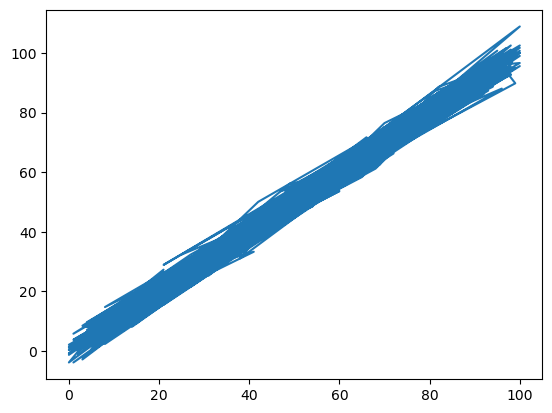

In [11]:
plt.plot("x","y", data=train)

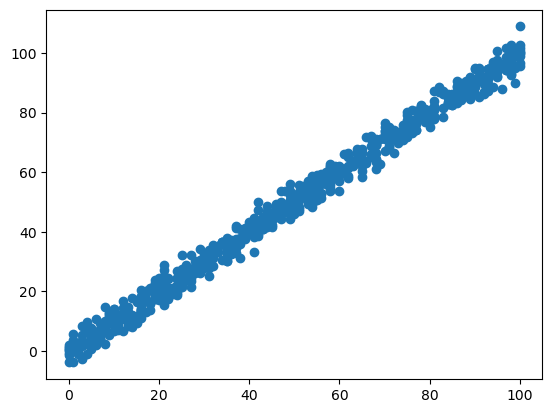

In [12]:
plt.scatter("x","y",data=train)

<BarContainer object of 700 artists>

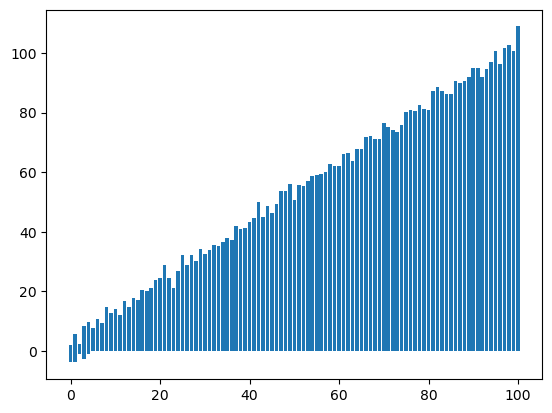

In [13]:
plt.bar("x","y", data=train)

**Detecting the Outliers**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ebb8f710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ebb8ff90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ebb8f790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ebb9d690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ebb9d9d0>],
 'means': []}

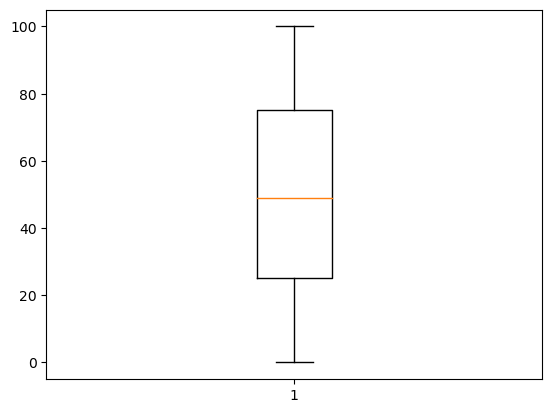

In [14]:
plt.boxplot("x", data=train)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ebb03550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ebb03ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ebb03290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ebb0e1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ebb0e510>],
 'means': []}

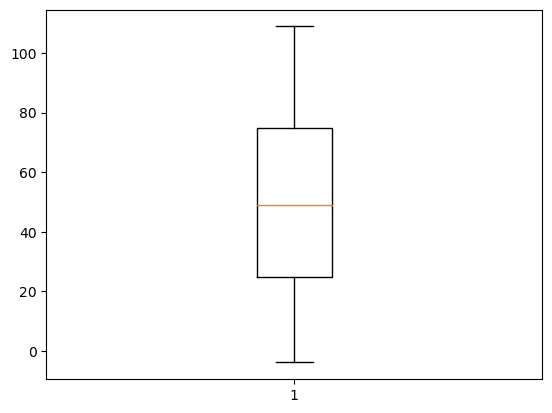

In [15]:
plt.boxplot("y", data=train)

> DROPPING NAN VALUES

In [16]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [17]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


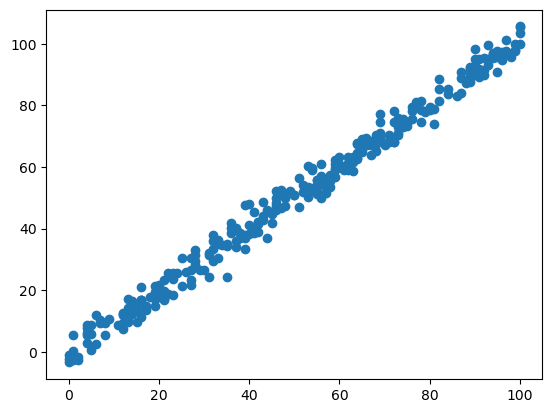

In [19]:
plt.scatter("x","y", data=test)

#Model
#1.Simple linear regression 
# laib=scikit learn#Model
#1.Simple linear regression 
# laib=scikit learn

In [20]:
from sklearn import linear_model

In [21]:
slr = linear_model.LinearRegression()

In [22]:
X_train = np.array(train.iloc[:, :-1].values)
y_train = np.array(train.iloc[:, :1].values)
X_test = np.array(test.iloc[:, :-1].values)
y_test = np.array(test.iloc[:, :1].values)

In [23]:
slr.fit(X_train,y_train)

LinearRegression()

# y=mx+c
# _coef (coefficient/slope/m)
# _intercept (bias/intercept)# y=mx+c
# _coef (coefficient/slope/m)
# _intercept (bias/intercept)

In [24]:
slr.coef_

array([[1.]])

In [25]:
slr.intercept_

array([0.])

In [26]:
y_pred = slr.predict(X_test)

In [27]:
accuracy = slr.score(X_test,y_test)
print(accuracy)

1.0


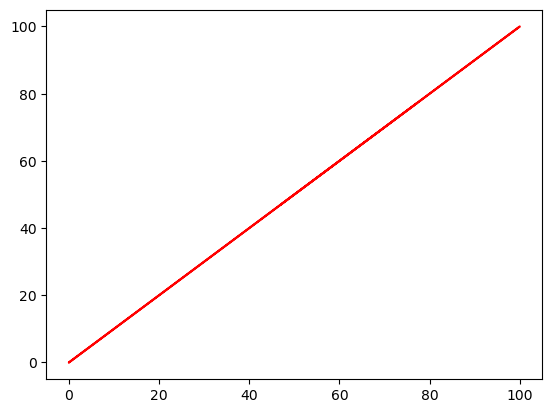

In [28]:
plt.plot(X_test, y_pred, color='red')
plt.show()

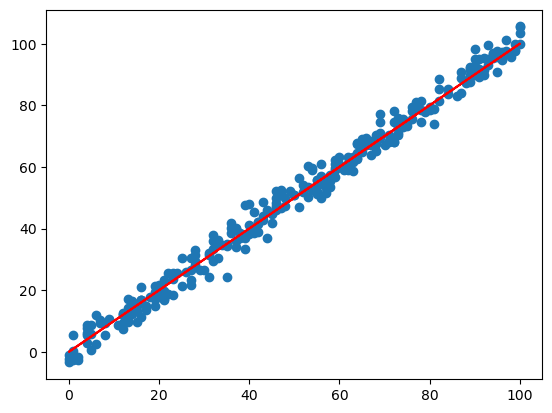

In [29]:
plt.scatter("x","y", data=test)
plt.plot(X_test, y_pred, color='red')
plt.show()